In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
df = pd.read_csv('../input/stores-area-and-sales-data/Stores.csv', index_col=0)
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [3]:
df.shape

(896, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [5]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [6]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [8]:
df.dtypes

Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

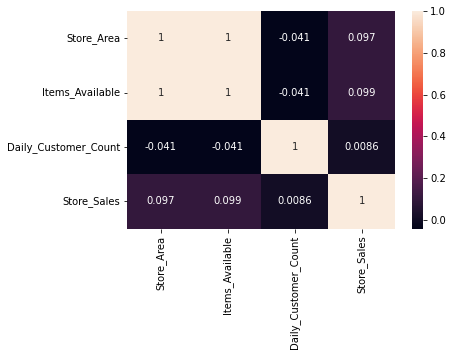

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

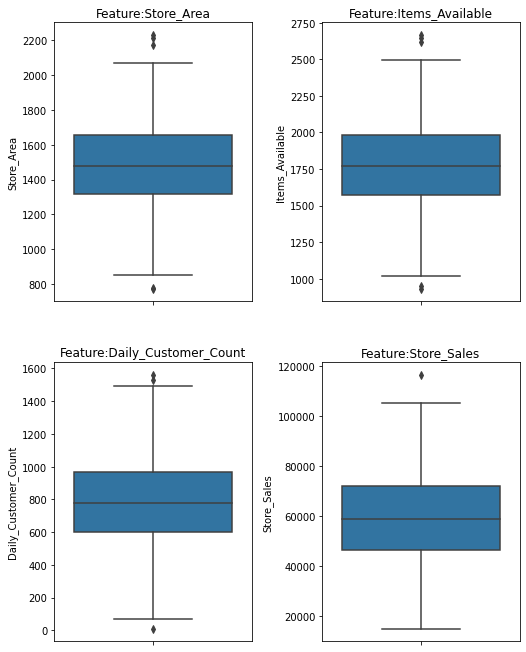

In [10]:
features = ['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales']
fig, axs = plt.subplots(2, 2, figsize=(8,10))
fig.tight_layout(pad=4.0)

for f,ax in zip(features,axs.ravel()):
    ax=sns.boxplot(ax=ax,data=df,y=df[f])
    ax.set_title('Feature:'+ f)

In [11]:
x = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [13]:
reg_list = [rf_reg]
for reg in reg_list:
        
    reg.fit(x,y)
        
    y_pred = reg.predict(x)
    
    mse = mean_squared_error(y_pred,y)
    rmse = np.sqrt(mean_squared_error(y_pred,y))
    mae = mean_absolute_error(y_pred,y)
    score = reg.score(x,y)
    
    print('Regressor:{}\nMSE:{:.2f}\nRMSE:{:.2f}\nMAE:{:.2f}\nScore:{:.4f}\n\n'.format(str(reg),mse,rmse,mae,score))

Regressor:RandomForestRegressor()
MSE:47958589.93
RMSE:6925.21
MAE:5574.36
Score:0.8375


